In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import random
df = pd.read_csv("advertising.csv")


In [2]:
def simulate_missing(df, missing_frac=0.1, seed=42):
    df_missing = df.copy()
    np.random.seed(seed)
    for col in df_missing.columns:
        if df_missing[col].dtype != 'object':
            n = len(df_missing)
            missing_indices = np.random.choice(n, int(missing_frac * n), replace=False)
            df_missing.loc[missing_indices, col] = np.nan
    return df_missing

In [3]:
def handle_missing(df, strategy='zero'):
    df_filled = df.copy()
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if strategy == 'zero':
                df_filled[col] = df[col].fillna(0)
            elif strategy == 'mean':
                df_filled[col] = df[col].fillna(df[col].mean())
            elif strategy == 'median':
                df_filled[col] = df[col].fillna(df[col].median())
    return df_filled


In [4]:
import pandas as pd

def min_max_scaling(df):
    df_scaled = df.copy()
    for col in df.columns:
        col_min = df[col].min()      # Find minimum value in column
        col_max = df[col].max()      # Find maximum value in column
        df_scaled[col] = (df[col] - col_min) / (col_max - col_min)  # Apply formula
    return df_scaled


In [5]:
def standard_scaling(df):
    df_scaled = df.copy()
    for col in df.columns:
        mean = df[col].mean()       # Find column mean
        std = df[col].std()         # Find column standard deviation
        df_scaled[col] = (df[col] - mean) / std  # Apply formula
    return df_scaled


In [6]:
def min_max_scaling(df):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    return pd.DataFrame(scaled_data, columns=df.columns)

def standard_scaling(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    return pd.DataFrame(scaled_data, columns=df.columns)


In [7]:
def detect_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    mask = (z_scores > threshold).any(axis=1)
    return mask


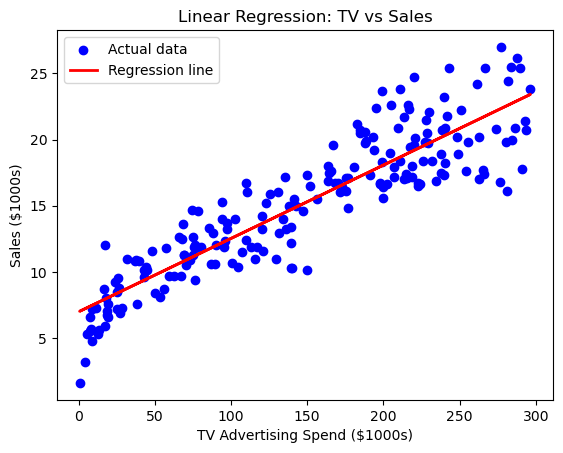

Weight (w): 0.05546477046955875
Bias (b): 6.974821488229898


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("advertising.csv")


X = df[["TV"]].values  # Feature
y = df["Sales"].values # Target


def linear_regression(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X] 
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    b = theta_best[0]  
    w = theta_best[1:] 
    return w, b

# Train
w, b = linear_regression(X, y)

# Predict
y_pred = X * w + b

# Plot
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel("TV Advertising Spend ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Linear Regression: TV vs Sales")
plt.legend()
plt.show()

print(f"Weight (w): {w[0]}")
print(f"Bias (b): {b}")


In [9]:
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res / ss_tot

In [10]:
import numpy as np
import pandas as pd

# 1. Simulate missing values
def simulate_missing(df, missing_fraction=0.1, random_state=42):
    np.random.seed(random_state)
    df_missing = df.copy()
    total_cells = df_missing.size
    n_missing = int(total_cells * missing_fraction)

    for _ in range(n_missing):
        i = np.random.randint(0, df_missing.shape[0])
        j = np.random.randint(0, df_missing.shape[1])
        df_missing.iat[i, j] = np.nan
    return df_missing

# 2. Handle missing values
def handle_missing(df, strategy="mean"):
    df_filled = df.copy()
    if strategy == "zero":
        df_filled = df_filled.fillna(0)
    elif strategy == "mean":
        df_filled = df_filled.fillna(df_filled.mean())
    elif strategy == "median":
        df_filled = df_filled.fillna(df_filled.median())
    return df_filled

# 3. Scaling functions
def min_max_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

def standard_scaling(df):
    return (df - df.mean()) / df.std()

# 4. Outlier detection
def detect_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    mask = (z_scores > threshold).any(axis=1)
    return mask

# 5. Linear regression
def linear_regression(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    b = theta_best[0]
    w = theta_best[1:]
    return w, b

# 6. R² calculation
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot


# ===== MAIN PIPELINE =====
# Load your data
df = pd.read_csv("advertising.csv")

df_missing = simulate_missing(df)
strategies = ["zero", "mean", "median"]
scalings = ["minmax", "standard"]

results = []

for strategy in strategies:
    df_filled = handle_missing(df_missing, strategy)
    for scale in scalings:
        # Apply scaling
        if scale == "minmax":
            df_scaled = min_max_scaling(df_filled)
        else:
            df_scaled = standard_scaling(df_filled)

        # Remove outliers
        outlier_mask = detect_outliers_zscore(df_scaled)
        df_no_outliers = df_scaled[~outlier_mask]

        # Prepare data
        X = df_scaled.drop("Sales", axis=1).values
        y = df_scaled["Sales"].values
        X_out = df_no_outliers.drop("Sales", axis=1).values
        y_out = df_no_outliers["Sales"].values

        # Model on full data
        w1, b1 = linear_regression(X, y)
        pred1 = np.dot(X, w1) + b1
        r2_1 = r_squared(y, pred1)

        # Model on data without outliers
        w2, b2 = linear_regression(X_out, y_out)
        pred2 = np.dot(X_out, w2) + b2
        r2_2 = r_squared(y_out, pred2)

        results.append({
            "missing_strategy": strategy,
            "scaling": scale,
            "r2_full": round(r2_1, 4),
            "r2_no_outliers": round(r2_2, 4)
        })

# Show results as DataFrame
results_df = pd.DataFrame(results)
print(results_df)


  missing_strategy   scaling  r2_full  r2_no_outliers
0             zero    minmax   0.3833          0.3776
1             zero  standard   0.3833          0.3776
2             mean    minmax   0.7434          0.7392
3             mean  standard   0.7434          0.7392
4           median    minmax   0.7376          0.7334
5           median  standard   0.7376          0.7334


In [11]:
for res in results:
    print(res)

{'missing_strategy': 'zero', 'scaling': 'minmax', 'r2_full': 0.4666, 'r2_no_outliers': 0.4614}
{'missing_strategy': 'zero', 'scaling': 'standard', 'r2_full': 0.4666, 'r2_no_outliers': 0.4614}
{'missing_strategy': 'mean', 'scaling': 'minmax', 'r2_full': 0.7202, 'r2_no_outliers': 0.7157}
{'missing_strategy': 'mean', 'scaling': 'standard', 'r2_full': 0.7202, 'r2_no_outliers': 0.7157}
{'missing_strategy': 'median', 'scaling': 'minmax', 'r2_full': 0.7079, 'r2_no_outliers': 0.7033}
{'missing_strategy': 'median', 'scaling': 'standard', 'r2_full': 0.7079, 'r2_no_outliers': 0.7033}


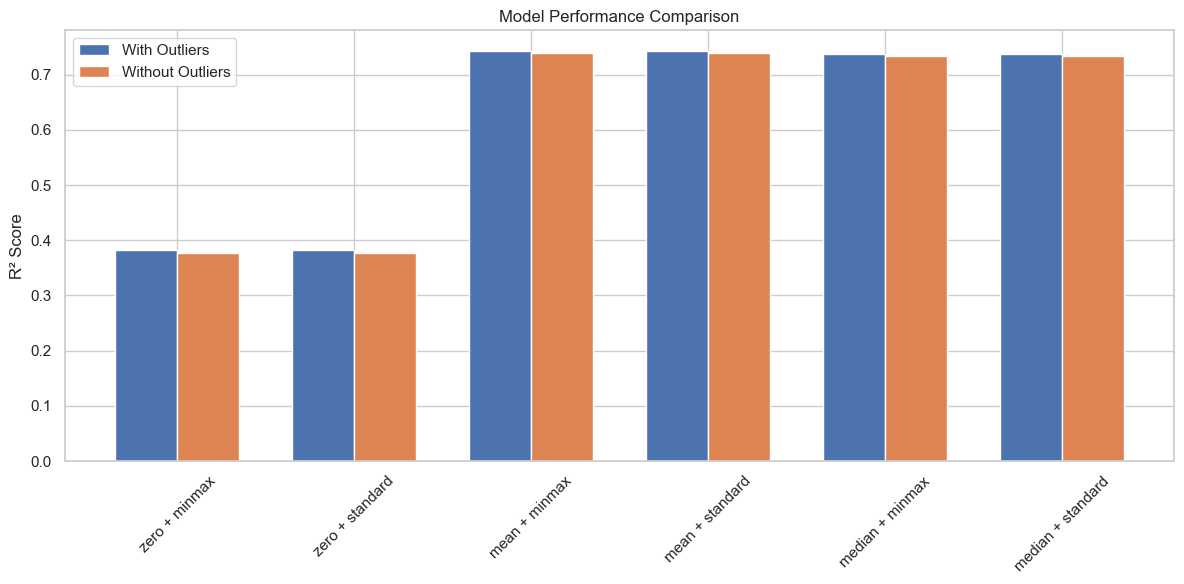

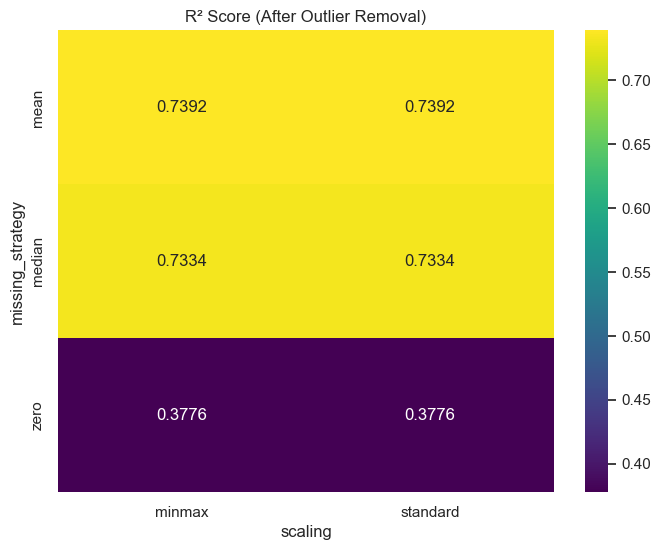

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Set plot style
sns.set(style="whitegrid")

# Plot 1: R² with full data vs after outlier removal
plt.figure(figsize=(12, 6))
x_labels = results_df['missing_strategy'] + " + " + results_df['scaling']

x = range(len(x_labels))
width = 0.35

plt.bar([i - width/2 for i in x], results_df['r2_full'], width=width, label='With Outliers')
plt.bar([i + width/2 for i in x], results_df['r2_no_outliers'], width=width, label='Without Outliers')

plt.xticks(x, x_labels, rotation=45)
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()

pivot_df = results_df.pivot(index="missing_strategy", columns="scaling", values="r2_no_outliers")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, fmt=".4f", cmap="viridis")
plt.title("R² Score (After Outlier Removal)")
plt.show()
